In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


importing libraries for the project and to load the file.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [3]:
data= pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [4]:
data.head(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [5]:
data.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

copying data to save original

In [6]:
df = data.copy()

dealing with categorical variables

In [7]:
gender= pd.get_dummies(df['Gender'],drop_first=True)
geo=pd.get_dummies(df['Geography'],drop_first=True)

In [8]:
df= pd.concat((df,gender,geo),axis=1)

lets visualise the data 

In [9]:
cat_features = ['Spain','Germany','Male','NumOfProducts','HasCrCard','IsActiveMember']
num_features = ['Tenure','Balance','EstimatedSalary','Age','CreditScore']

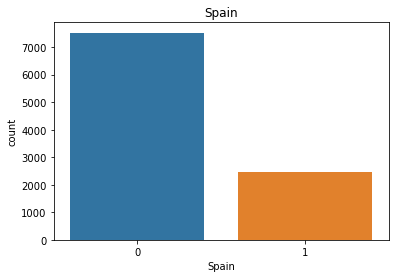

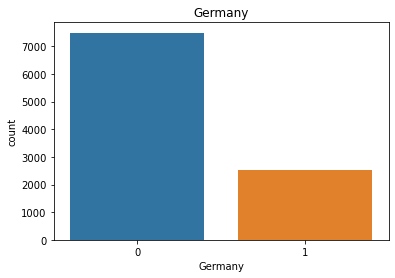

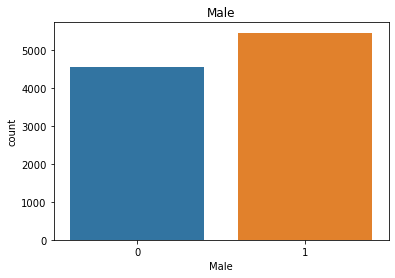

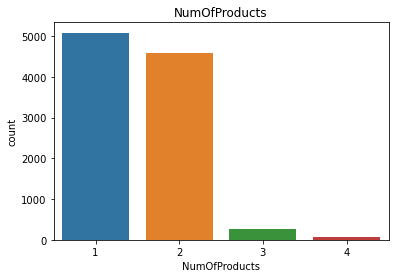

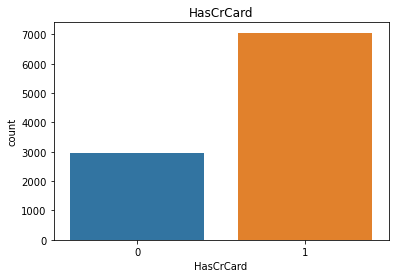

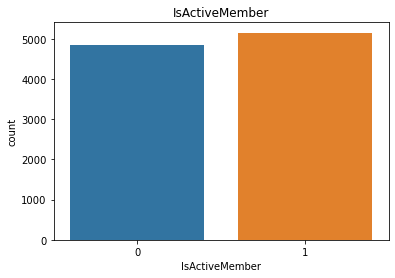

In [10]:
for i in cat_features:
    ax=sns.countplot(x=df[i], data=df);
    plt.title(i)
    plt.show()

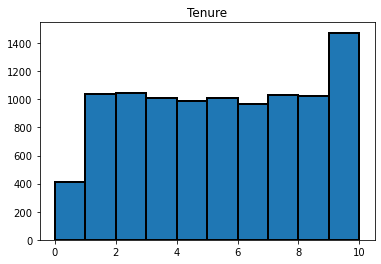

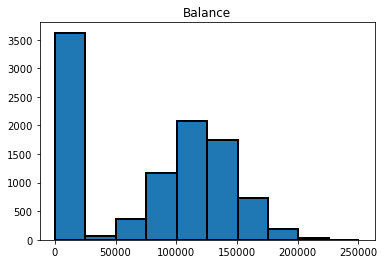

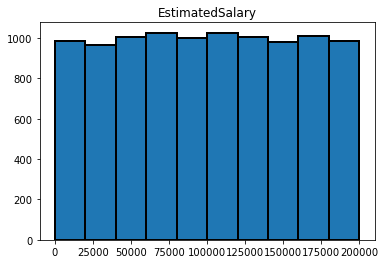

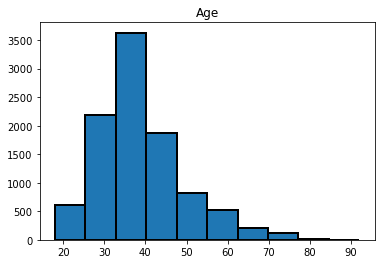

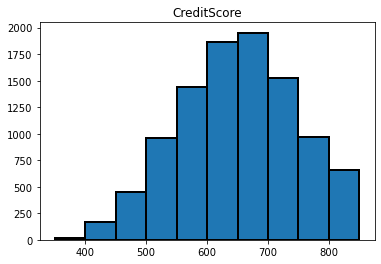

In [11]:
for i in num_features:
    plt.hist(df[i],   edgecolor='black',linewidth=2)
    plt.title(i)
    plt.show()

checking for missing values

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

droping unneccesary data

In [13]:
df = df.drop(['Gender','Geography'],axis=1)

In [14]:
from pandas_profiling import ProfileReport

In [15]:
profile = ProfileReport(df, title=" Report")

In [16]:
# profile

In [17]:
Remove = ['RowNumber', 'CustomerId', 'Surname','EstimatedSalary','HasCrCard','CreditScore','Germany']

In [18]:
df = df.drop(Remove,axis=1)

normalising the data for or to fit

In [19]:
sc = StandardScaler()

In [20]:
df['Balance']= sc.fit_transform(df[['Balance']])
df['Age'] = sc.fit_transform(df[['Age']])

creating X and Y variaable

In [21]:
Y = df[['Exited']]
X = df.drop(['Exited'],axis=1)

spliting data into train and test

In [22]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=1234,stratify=Y)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)  

In [24]:
model = LogisticRegression()

In [25]:
model1.fit(X_train,Y_train)
Y_predict = model1.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Checking the accuracy of the model

In [26]:
cm = confusion_matrix(Y_test,Y_predict)
cm

array([[2238,  151],
       [ 318,  293]])

checking the accuracy

In [27]:
model1.score(X_test,Y_test)

0.8436666666666667